--- Scaling Data and Applying ICA ---
Data standardized.
ICA applied with n_components = 8.

Head of the DataFrame with Independent Components:
        IC1       IC2       IC3       IC4       IC5       IC6       IC7  \
0  0.541023 -0.181838 -1.199529  0.099803 -0.194058 -1.268576 -1.055657   
1  1.819917  0.965566 -0.705581  0.563684 -1.448255  0.394455 -0.446566   
2 -0.797420 -0.661993 -1.035796  0.707896  0.246554 -0.518521 -0.512799   
3 -0.259696 -0.342198 -1.718477  0.102803 -1.395696  0.368006 -1.659808   
4  0.536251 -1.991454 -0.356099 -0.045686  0.061112 -0.412208 -0.398060   

        IC8  
0 -0.067520  
1 -0.967222  
2  0.990698  
3  0.133429  
4 -0.214677  

--- Evaluating ICA Performance ---

1. Visual Comparison: Original Features vs. Independent Components Distributions


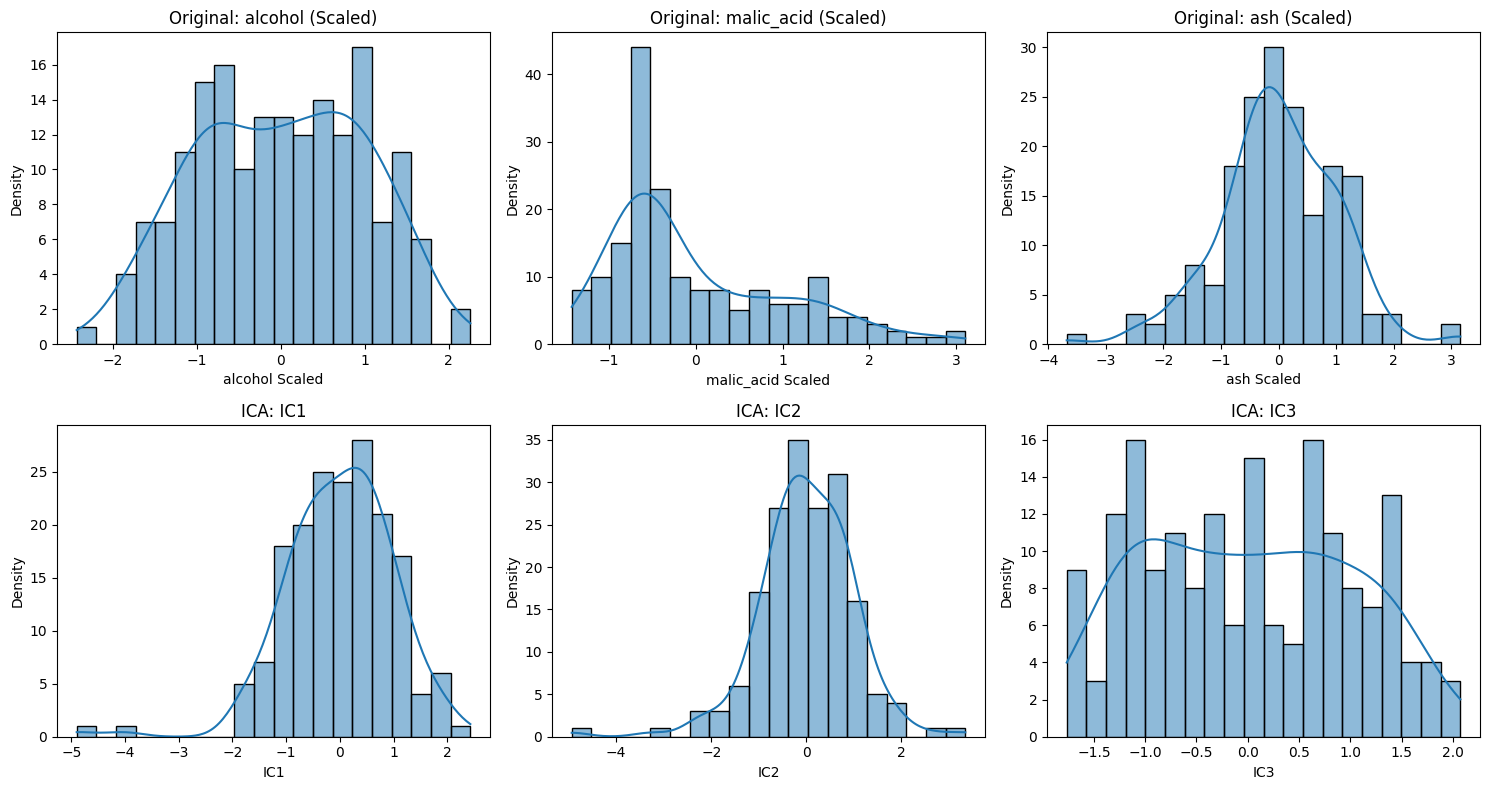


2. Statistical Measures of Independent Components:

2.1. Non-Gaussianity: Skewness and Kurtosis of ICs
Skewness:
 IC1   -0.890478
IC2   -0.678310
IC3    0.093438
IC4   -0.621955
IC5   -0.131759
IC6   -2.538943
IC7    0.262310
IC8    0.388419
dtype: float64

Kurtosis (Excess):
 IC1     3.407941
IC2     3.606478
IC3    -1.102064
IC4     2.010403
IC5    -0.586775
IC6    11.596150
IC7    -0.967943
IC8     3.466606
dtype: float64

2.2. Statistical Independence: Correlation Matrix of ICs
     IC1  IC2  IC3  IC4  IC5  IC6  IC7  IC8
IC1  1.0  0.0 -0.0 -0.0  0.0 -0.0  0.0 -0.0
IC2  0.0  1.0 -0.0  0.0 -0.0  0.0  0.0 -0.0
IC3 -0.0 -0.0  1.0  0.0 -0.0 -0.0  0.0 -0.0
IC4 -0.0  0.0  0.0  1.0  0.0 -0.0  0.0 -0.0
IC5  0.0 -0.0 -0.0  0.0  1.0  0.0 -0.0  0.0
IC6 -0.0  0.0 -0.0 -0.0  0.0  1.0  0.0 -0.0
IC7  0.0  0.0  0.0  0.0 -0.0  0.0  1.0  0.0
IC8 -0.0 -0.0 -0.0 -0.0  0.0 -0.0  0.0  1.0


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FastICA
from scipy.stats import kurtosis, normaltest # For non-Gaussianity checks

# Load data
wine = load_wine()
X = wine.data
df = pd.DataFrame(X, columns=wine.feature_names)

# --- Scale Data and Apply ICA ---

print("--- Scaling Data and Applying ICA ---")

# 1. Standardize the data
# ICA performs best with scaled data (mean 0, variance 1).
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
print("Data standardized.")

# 2. Apply FastICA
# n_components: Number of independent components to extract (e.g., 8 from prior analysis).
n_components_for_ica = 8
ica = FastICA(n_components=n_components_for_ica, random_state=42, tol=0.01, max_iter=1000)

# Fit ICA to scaled data and transform to get independent components
independent_components = ica.fit_transform(X_scaled)
ica_df = pd.DataFrame(data=independent_components,
                      columns=[f'IC{i+1}' for i in range(n_components_for_ica)])
print(f"ICA applied with n_components = {n_components_for_ica}.")

print("\nHead of the DataFrame with Independent Components:")
print(ica_df.head())

# --- Visualizations & Data to Show ICA Performance ---

print("\n--- Evaluating ICA Performance ---")

print("\n1. Visual Comparison: Original Features vs. Independent Components Distributions")
# ICA aims to extract non-Gaussian components. Visually compare original vs. IC distributions.
num_plots_to_show = min(3, n_components_for_ica) # Plot up to 3 components/features

plt.figure(figsize=(15, 8))
for i in range(num_plots_to_show):
    # Plot Original Feature distribution (scaled for fair comparison)
    plt.subplot(2, num_plots_to_show, i + 1)
    sns.histplot(X_scaled[:, i], kde=True, bins=20)
    plt.title(f'Original: {df.columns[i]} (Scaled)')
    plt.xlabel(f'{df.columns[i]} Scaled')
    plt.ylabel('Density')

    # Plot Independent Component distribution
    plt.subplot(2, num_plots_to_show, i + 1 + num_plots_to_show)
    sns.histplot(ica_df.iloc[:, i], kde=True, bins=20)
    plt.title(f'ICA: IC{i+1}')
    plt.xlabel(f'IC{i+1}')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()
# Interpretation: Observe how the distributions change. ICA components (bottom row) should
# typically appear more distinctly non-Gaussian (e.g., more skewed, peaked, or uniform)
# compared to the original features (top row), reflecting ICA's goal.

print("\n2. Statistical Measures of Independent Components:")

print("\n2.1. Non-Gaussianity: Skewness and Kurtosis of ICs")
# High absolute values indicate successful non-Gaussianity extraction.
print("Skewness:\n", ica_df.skew())
print("\nKurtosis (Excess):\n", ica_df.kurtosis())
# Interpretation: Values significantly different from 0 confirm non-Gaussian distributions.

print("\n2.2. Statistical Independence: Correlation Matrix of ICs")
# Independent components should be uncorrelated (values near 0).
correlation_matrix_ics = ica_df.corr()
print(correlation_matrix_ics.round(3))
# Interpretation: Off-diagonal values should be very close to 0. This shows ICA's success
# in decorrelating the components, which is a necessary step towards statistical independence.